# National Basketball Association (NBA),
**a professional North American basketball league**

In this activity, I'll be working for a firm that provides insights to the National Basketball Association (NBA), a professional North American basketball league. I will help NBA managers and coaches identify which players are most likely to thrive in the high-pressure environment of professional basketball and help the team be successful over time

# Data Dictionary

This activity uses a dataset called 
nba-players.csv
. It represents 22 columns of United States National Basketball Association (NBA) player performance records per game for one season, including stats like average number of 3-point baskets made per game, and average number of offensive rebounds per game. 

The dataset contains:

**1,340 rows** – each row is a different NBA player’s stats per game across one season

**22 columns**

# Step 1: Imports

In [1]:
# Import pandas.

import numpy as np
import pandas as pd
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.
# Save in a variable named `data`.

data = pd.read_csv("/kaggle/input/nba-dataset/NBA.csv")

# Step 2: Data exploration

Display the first 10 rows of the data to get a sense of what it entails.

In [3]:
data.head(10)

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
5,5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0
6,6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1
7,7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1
8,8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0
9,9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,...,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0


Display the number of rows and the number of columns to get a sense of how much data is available to you.

In [4]:
data.shape

(1340, 22)

Display all column names to get a sense of the kinds of metadata available about each player. Use the columns property in pandas.

In [5]:
data.columns

Index(['Unnamed: 0', 'name', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made',
       '3pa', '3p', 'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl',
       'blk', 'tov', 'target_5yrs'],
      dtype='object')

Display a summary of the data to get additional information about the DataFrame, including the types of data in the columns.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1340 non-null   int64  
 1   name         1340 non-null   object 
 2   gp           1340 non-null   int64  
 3   min          1340 non-null   float64
 4   pts          1340 non-null   float64
 5   fgm          1340 non-null   float64
 6   fga          1340 non-null   float64
 7   fg           1340 non-null   float64
 8   3p_made      1340 non-null   float64
 9   3pa          1340 non-null   float64
 10  3p           1340 non-null   float64
 11  ftm          1340 non-null   float64
 12  fta          1340 non-null   float64
 13  ft           1340 non-null   float64
 14  oreb         1340 non-null   float64
 15  dreb         1340 non-null   float64
 16  reb          1340 non-null   float64
 17  ast          1340 non-null   float64
 18  stl          1340 non-null   float64
 19  blk   

The columns with integer numbers are gp=number of games and the last column about the target_5yrs. All the others columns are floating-point numbers with double-precision.

# Check for missing values

In [7]:
# Display the number of missing values in each column.
# Check whether each value is missing.
#Aggregate the number of missing values per column.


# 1. Display the number of missing values in each column
missing_values_per_column = data.isnull().sum()
print("Number of missing values per column:\n", missing_values_per_column)

# 2. Check whether each value is missing
missing_values_indicator = data.isnull()
print("Missing value indicator:\n", missing_values_indicator)

# 3. Aggregate the number of missing values per column (alternative method)
total_missing_values = missing_values_indicator.sum().sum()
print("Total number of missing values:", total_missing_values)

Number of missing values per column:
 Unnamed: 0     0
name           0
gp             0
min            0
pts            0
fgm            0
fga            0
fg             0
3p_made        0
3pa            0
3p             0
ftm            0
fta            0
ft             0
oreb           0
dreb           0
reb            0
ast            0
stl            0
blk            0
tov            0
target_5yrs    0
dtype: int64
Missing value indicator:
       Unnamed: 0   name     gp    min    pts    fgm    fga     fg  3p_made  \
0          False  False  False  False  False  False  False  False    False   
1          False  False  False  False  False  False  False  False    False   
2          False  False  False  False  False  False  False  False    False   
3          False  False  False  False  False  False  False  False    False   
4          False  False  False  False  False  False  False  False    False   
...          ...    ...    ...    ...    ...    ...    ...    ...      ...   
133

Checking for missing values in your data is crucial for several reasons:

1. Data Quality: Missing data can significantly impact the accuracy and reliability of your analysis. If not addressed, it can lead to biased results and incorrect conclusions.
1. Data Cleaning: Identifying and handling missing values is a fundamental step in data cleaning and preparation. This process ensures that your data is consistent and suitable for further analysis.
1. Model Performance: Many machine learning algorithms are sensitive to missing data. If not properly handled, it can degrade the performance of your models.
1. Bias and Inconsistency: Missing values can introduce bias into your analysis, especially if the missingness is related to other variables. For example, if missing values are more common in a particular group, it can lead to biased results.
1. Data Interpretation: Understanding the patterns of missing data can provide insights into the data collection process and potential issues. For instance, if many values are missing for a specific variable, it might indicate a problem with the data collection method.

# Step 3: Statistical tests

To understand how balanced the dataset is in terms of class, display the percentage of values that belong to each class in the target column. In this context, class 1 indicates an NBA career duration of at least five years, while class 0 indicates an NBA career duration of less than five years.

In [8]:
# Display percentage (%) of values for each class (1, 0) represented in the target column of this dataset.

# Count the occurrences of each class in the target column
class_counts = data['target_5yrs'].value_counts()

# Calculate the percentage of each class
class_percentages = class_counts / len(data)*100

print("Class Distribution:")
print(class_percentages)

Class Distribution:
target_5yrs
1    62.014925
0    37.985075
Name: count, dtype: float64


* About 62% of the values in the target columm belong to class 1, and about 38% of the values belong to class 0. In other words, about 62% of players represented by this data have an NBA career duration of at least five years, and about 38% do not.
* The dataset is not perfectly balanced, but an exact 50-50 split is a rare occurance in datasets, and a 62-38 split is not too imbalanced. However, if the majority class made up 90% or more of the dataset, then that would be of concern, and it would be prudent to address that issue through techniques like upsampling and downsampling.

# Step 4: Results and evaluation

* You should avoid selecting the name column as a feature. A player's name is not helpful in determining their career duration. Moreover, it may not be ethical or fair to predict a player's career duration based on a name.
* The number of games a player has played in may not be as important in determining their career duration as the number of points they have earned. While you could say that someone who has played in more games may have more practice and experience, the points they earn during the games they played in would speak more to their performance as a player. This, in turn, would influence their career duration. So, the gp column on its own may not be a helpful feature. However, gp and pts could be combined to get the total number of points earned across the games played, and that result could be a helpful feature. That approach can be implemented later in the feature engineering process—in feature extraction.
* If the number of points earned across games will be extracted as a feature, then that could be combined with the number of minutes played across games (min * gp) to extract another feature. This could be a measure of players' efficiency and could help in predicting players' career duration. min on its own may not be useful as a feature for the same reason as gp.
* There are three different columns that give information about field goals. The percent of field goals a player makes (fg) says more about their performance than the number of field goals they make (fgm) or the number of field goals they attempt (fga). The percent gives more context, as it takes into account both how many field goals a player successfully made and how many field goals they attempted in total. This allows for a more meaningful comparison between players. The same logic applies to the percent of three-point field goals made, as well as the percent of free throws made.
* There are columns for the number offensive rebounds (oreb), the number of defensive rebounds (dreb), and the number of rebounds overall (reb). Because the overall number of rebounds should already incorporate both offensive and defensive rebounds, it would make sense to use the overall as a feature.
* The number of assists (ast), steals (stl), blocks (blk), and turnovers (tov) also provide information about how well players are performing in games, and thus, could be helpful in predicting how long players last in the league.

Therefore, at this stage of the feature engineering process, it would be most effective to select the following columns:

gp, min, pts, fg, 3p, ft, reb, ast, stl, blk, tov.

Perform feature engineering, with the goal of identifying and creating features that will serve as useful predictors for the target variable, *target_5yrs*.

In [9]:
# Select the columns to proceed with and save the DataFrame in new variable `selected_data`.
# Include the target column, `target_5yrs`.
selected_data = data[["gp", "min", "pts", "fg", "3p", "ft", "reb", "ast", "stl", "blk", "tov", "target_5yrs"]]

**Feature transformation**

An important aspect of feature transformation is feature encoding. If there are categorical columns that you would want to use as features, those columns should be transformed to be numerical. This technique is also known as feature encoding.

### Feature extraction

In [10]:
# Display the first few rows of `selected_data` for reference.
selected_data.head()

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1


The gp, pts, min columns lend themselves to feature extraction.
* gp represents the total number of games a player has played in, and pts represents the average number of points the player has earned per game. It might be helpful to combine these columns to get the total number of points the player has earned across the games and use the result as a new feature, which could be added into a new column named total_points. The total points earned by a player can reflect their performance and shape their career longevity.
* The min column represents the average number of minutes played per game. total_points could be combined with min and gp to extract a new feature: points earned per minute. This can be considered a measure of player efficiency, which could shape career duration. This feature can be added into a column named efficiency.

In [11]:
# Extract two features that would help predict target_5yrs.
# Create a new variable named `extracted_data`.

# Make a copy of `selected_data` 
extracted_data = selected_data.copy()

# Add a new column named `total_points`; 
# Calculate total points earned by multiplying the number of games played by the average number of points earned per game
extracted_data["total_points"] = extracted_data["gp"] * extracted_data["pts"]

# Add a new column named `efficiency`. Calculate efficiency by dividing the total points earned by the total number 
# of minutes played, which yields points per minute. (Note that `min` represents avg. minutes per game.)
extracted_data["efficiency"] = extracted_data["total_points"] / (extracted_data["min"] * extracted_data["gp"])

# Display the first few rows of `extracted_data` to confirm that the new columns were added.
extracted_data.head()

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304


In [12]:
# Remove any columns from `extracted_data` that are no longer needed.

# Remove `gp`, `pts`, and `min` from `extracted_data`.
extracted_data = extracted_data.drop(columns=["gp", "pts", "min"])

# Display the first few rows of `extracted_data` to ensure that column drops took place.

extracted_data.head()

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304


# Step 5: Model preparation

**Isolate your target and predictor variables**

Separately define the target variable (target_5yrs) and the features.

In [13]:
# Define the y (target) variable.

y = extracted_data['target_5yrs']

# Define the X (predictor) variables.

X = extracted_data.drop('target_5yrs', axis = 1)

Display the first 10 rows of your target and predictor variables. This will help you get a sense of how the data is structured.

In [14]:
y.head(10)

0    0
1    0
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: target_5yrs, dtype: int64

Given that the target variable contains both 1 and 0 indicates that it is binary and requires a model suitable for binary classification.

**Perform a split operation on your data**

Divide your data into a training set (75% of data) and test set (25% of data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not observed. This tests how well the model generalizes—or performs—on new data.

In [15]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

# Print the shape of each output

Print the shape of each output from your train-test split. This will verify that the split operated as expected.

In [16]:
# Print the shape (rows, columns) of the output from the train-test split.

# Print the shape of X_train.
print(X_train.shape)

# Print the shape of X_test.
print(X_test.shape)

# Print the shape of y_train.
print(y_train.shape)

# Print the shape of y_test.
print(y_test.shape)

(1005, 10)
(335, 10)
(1005,)
(335,)


Each training DataFrame contains 1,005 rows, while each test DataFrame contains 335 rows. Additionally, there are 10 columns in each X DataFrame, with only one column in each y DataFrame.

The effect of the train-test split showed an approximately 75% training and 25% test split.

# Step 6: Model building

Using the assumption that your features are normally distributed and continuous, the Gaussian Naive Bayes algorithm is most appropriate for this data. While my data may not perfectly adhere to these assumptions, this model will still yield the most usable and accurate results.

By creating this model, I will be drawing on my feature engineering work by training the classifier on the X_train DataFrame. I will use this to predict target_5yrs from y_train.

Start by defining nb to be the relevant algorithm from sklearn.naive_bayes. Then fit my model to the training data. Use this fitted model to create predictions for the test data.

In [17]:
# Assign `nb` to be the appropriate implementation of Naive Bayes.
nb = naive_bayes.GaussianNB()

# Fit the model on your training data.
nb.fit(X_train, y_train)

# Apply your model to predict on your test data. Call this "y_pred".
y_pred = nb.predict(X_test)

# Step 7: Results and evaluation

In [18]:
# Print your accuracy score.
print('accuracy score:'), print(metrics.accuracy_score(y_test, y_pred))

# Print your precision score.
print('precision score:'), print(metrics.precision_score(y_test, y_pred))

# Print your recall score.
print('recall score:'), print(metrics.recall_score(y_test, y_pred))

# Print your f1 score.
print('f1 score:'), print(metrics.f1_score(y_test, y_pred))

accuracy score:
0.6895522388059702
precision score:
0.8405797101449275
recall score:
0.5858585858585859
f1 score:
0.6904761904761905


(None, None)

The accuracy score for this model is 0.6896, or 69.0% accurate.

In classification problems, accuracy is useful to know but may not be the best metric by which to evaluate this model. While accuracy is often the most intuitive metric, it is a poor evaluation metric in some cases. In particular, if you have imbalanced classes, a model could appear accurate but be poor at balancing false positives and false negatives.

Precision and recall scores are both useful to evaluate the correct predictive capability of a model because they balance the false positives and false negatives inherent in prediction.

The model shows a precision score of 0.8406, suggesting the model is quite good at predicting true positives—meaning the player will play longer than five years—while balancing false positives. The recall score of 0.5859 shows worse performance in predicting true negatives—where the player will not play for five years or more—while balancing false negatives.These two metrics combined can give a better assessment of model performance than accuracy does alone.

The F1 score balances the precision and recall performance to give a combined assessment of how well this model delivers predictions. In this case, the F1 score is 0.6905, which suggests reasonable predictive power in this model.

**Gain clarity with the confusion matrix**

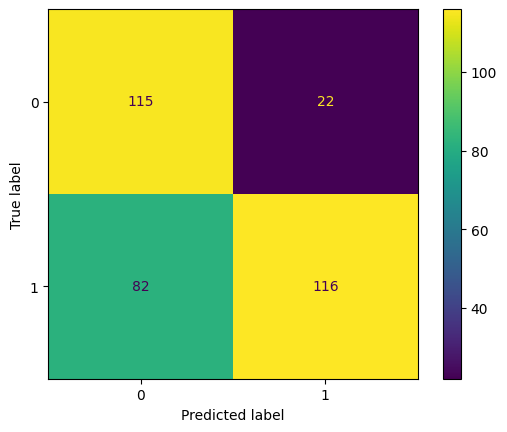

In [19]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.
cm = metrics.confusion_matrix(y_test, y_pred)

# Create the display for your confusion matrix.
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)

# Plot the visual in-line.
disp.plot()

* The top left to bottom right diagonal in the confusion matrix represents the correct predictions, and the ratio of these squares showcases the accuracy.
 
* The concentration of true positives stands out relative to false positives. This ratio is why the precision score is so high (0.8406).

* True negatives and false negatives are closer in number, which explains the worse recall score.

# Considerations

* The evaluation of the model is important to inform if the model has delivered accurate predictions.
* Splitting the data was important for ensuring that there was new data for the model to test its predictive performance.
* Each metric provided an evaluation from a different standpoint, and accuracy alone was not a strong way to evaluate the model.
* Effective assessments balance the true/false positives versus true/false negatives through the confusion matrix and F1 score.

* Showcase the data used to create the prediction and the performance of the model overall.
* Review the sample output of the features and the confusion matrix to indicate the model's performance.
* Highlight the metric values, emphasizing the F1 score.

* The model created provides some value in predicting an NBA player's chances of playing for five years or more.
* Notably, the model performed better at predicting true positives than it did at predicting true negatives. In other words, it more accurately identified those players who will likely play for more than five years than it did those who likely will not.